In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_influencer = pd.read_csv("influencers.csv")

foll = {
    "sedikit" : [0,25000,38000,100000],
    "sedang" : [0,25000,38000,60000,70000,100000],
    "banyak" : [0,60000,70000,100000]
}

engRate = {
    "rendah" : [0,2.5,4,10],
    "sedang" : [0,2.5,4,6,7.5,10],
    "tinggi" : [0,6,7.5,10]
}

takagiSugeno = {
    "rejected" : 45,
    "considered" : 75,
    "accepted" : 100
}

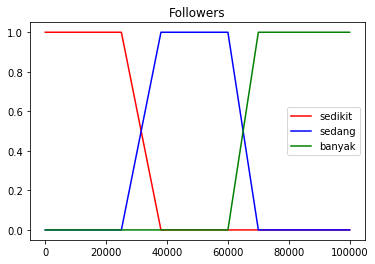

In [3]:
# MEMBERSHIP FUNCTION : FOLLOWERS
x1 = foll["sedikit"]
y1 = [1,1,0,0]

x2 = foll["sedang"]
y2 = [0,0,1,1,0,0]

x3 = foll["banyak"]
y3 = [0,0,1,1]

plt.plot( x1, y1, color='red', label = "sedikit")
plt.plot( x2, y2, color='blue', label = "sedang")
plt.plot( x3, y3, color='green', label="banyak")
plt.title("Followers")
plt.legend()

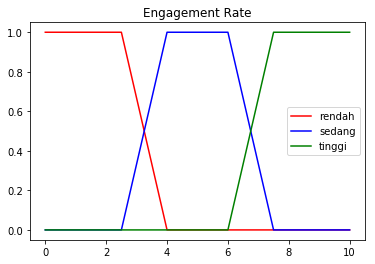

In [4]:
# MEMBERSHIP FUNCTION : ENGAGEMENT RATE
x1 = engRate["rendah"]
y1 = [1,1,0,0]

x2 = engRate["sedang"]
y2 = [0,0,1,1,0,0]

x3 = engRate["tinggi"]
y3 = [0,0,1,1]

plt.plot( x1, y1, color='red', label = "rendah")
plt.plot( x2, y2, color='blue', label = "sedang")
plt.plot( x3, y3, color='green', label="tinggi")
plt.title("Engagement Rate")
plt.legend()

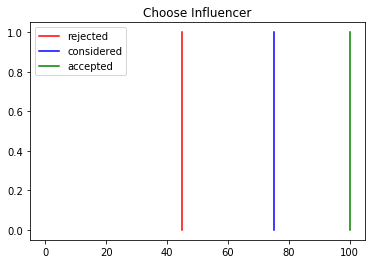

In [5]:
# MEMBERSHIP FUNCTION TAKAGI-SUGENO STYLE : OUTPUT
x0 = [0,0]
y0 = [0,0]

x1 = [takagiSugeno["rejected"],takagiSugeno["rejected"]]
y1 = [1,0]

x2 = [takagiSugeno["considered"],takagiSugeno["considered"]]
y2 = [1,0]

x3 = [takagiSugeno["accepted"],takagiSugeno["accepted"]]
y3 = [1,0]

plt.plot( x0, y0)
plt.plot( x1, y1, color='red', label = "rejected")
plt.plot( x2, y2, color='blue', label = "considered")
plt.plot( x3, y3, color='green', label="accepted")
plt.title("Choose Influencer")
plt.legend()

In [6]:
def fuzzificationFollCount(follCount):
    if (foll["sedikit"][0] <= follCount <= foll["sedikit"][1]):
        sedikit = 1
    elif (foll["sedikit"][1] < follCount <= foll["sedikit"][2]):
        sedikit = (foll["sedikit"][2] - follCount)/(foll["sedikit"][2] - foll["sedikit"][1])
    elif (foll["sedikit"][2] < follCount <= foll["sedikit"][3]):
        sedikit = 0
        
    if (foll["sedang"][0] <= follCount <= foll["sedang"][1]):
        sedang = 0
    elif (foll["sedang"][1] < follCount <= foll["sedang"][2]):
        sedang = (follCount - foll["sedang"][1])/(foll["sedang"][2] - foll["sedang"][1])
    elif (foll["sedang"][2] < follCount <= foll["sedang"][3]):
        sedang = 1
    elif (foll["sedang"][3] < follCount <= foll["sedang"][4]):
        sedang = (foll["sedang"][4] - follCount)/(foll["sedang"][4] - foll["sedang"][3])
    elif (foll["sedang"][4] < follCount <= foll["sedang"][5]):
        sedang = 0
        
    if (foll["banyak"][0] <= follCount <= foll["banyak"][1]):
        banyak = 0
    elif (foll["banyak"][1] < follCount <= foll["banyak"][2]):
        banyak = (foll["banyak"][2] - follCount)/(foll["banyak"][2] - foll["banyak"][1])
    elif (foll["banyak"][2] < follCount <= foll["banyak"][3]):
        banyak = 1
        
    return [sedikit,sedang,banyak]

def fuzzificationER(engagement):
    if (engRate["rendah"][0] <= engagement <= engRate["rendah"][1]):
        rendah = 1
    elif (engRate["rendah"][1] < engagement <= engRate["rendah"][2]):
        rendah = (engRate["rendah"][2] - engagement)/(engRate["rendah"][2] - engRate["rendah"][1])
    elif (engRate["rendah"][2] < engagement <= engRate["rendah"][3]):
        rendah = 0
        
    if (engRate["sedang"][0] <= engagement <= engRate["sedang"][1]):
        sedang = 0
    elif (engRate["sedang"][1] < engagement <= engRate["sedang"][2]):
        sedang = (engagement - engRate["sedang"][1])/(engRate["sedang"][2] - engRate["sedang"][1])
    elif (engRate["sedang"][2] < engagement <= engRate["sedang"][3]):
        sedang = 1
    elif (engRate["sedang"][3] < engagement <= engRate["sedang"][4]):
        sedang = (engRate["sedang"][4] - engagement)/(engRate["sedang"][4] - engRate["sedang"][3])
    elif (engRate["sedang"][4] < engagement <= engRate["sedang"][5]):
        sedang = 0
        
    if (engRate["tinggi"][0] <= engagement <= engRate["tinggi"][1]):
        tinggi = 0
    elif (engRate["tinggi"][1] < engagement <= engRate["tinggi"][2]):
        tinggi = (engRate["tinggi"][2] - engagement)/(engRate["tinggi"][2] - engRate["tinggi"][1])
    elif (engRate["tinggi"][2] < engagement <= engRate["tinggi"][3]):
        tinggi = 1

    return [rendah,sedang,tinggi]

def inferensi(idx):
    rejected = max(min(valueFollCount[idx][0],valueER[idx][0]), 
                  min(valueFollCount[idx][0],valueER[idx][1]), 
                  min(valueFollCount[idx][1],valueER[idx][0]))
    
    considered = max(min(valueFollCount[idx][0],valueER[idx][2]),
                    min(valueFollCount[idx][1],valueER[idx][1]),
                    min(valueFollCount[idx][2],valueER[idx][0]))
    
    accepted = max(min(valueFollCount[idx][1],valueER[idx][2]),
                    min(valueFollCount[idx][2],valueER[idx][1]),
                    min(valueFollCount[idx][1],valueER[idx][1]))
    
    return data_influencer["id"][idx], rejected, considered, accepted

def deFuzzification(inferensi):
    return (inferensi[0], 
            (inferensi[1]*takagiSugeno["rejected"] + inferensi[2]*takagiSugeno["considered"] 
             + inferensi[3]*takagiSugeno["accepted"])/(inferensi[1]+inferensi[2]+inferensi[3]))

In [10]:
valueFollCount = []
valueER = []
score = []
for i in range(len(data_influencer)):
    valueFollCount.append(fuzzificationFollCount(data_influencer["followerCount"][i]))
    valueER.append(fuzzificationER(data_influencer["engagementRate"][i]))
    score.append(deFuzzification(inferensi(i)))

score.sort(key=lambda x:x[1],reverse=True)
choosenID = []
count = 0
for i in range(20):
    choosenID.append(score[i][0])
    print(choosenID[i])

with open("choosen.csv","w") as f:
    wr = csv.writer(f,delimiter="\n")
    wr.writerow(choosenID)

11
13
41
2
19
59
60
61
72
75
25
39
76
67
53
36
74
48
100
93
